<a href="https://colab.research.google.com/github/Lauralug0/GBC/blob/main/Preprocessing_05_Simple_ImputerbyLL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SimpleImputer
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [51]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### How many Categorical variables in the dataset?

In [52]:
df.info()

categorical_variables = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
print(f"\nNumber of categorical variables: {len(categorical_variables)}")
print(f"Categorical variables: {categorical_variables}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB

Number of ca

### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [53]:
for i in range(len(df.columns)):
    missing_data = df.iloc[:, i].isna().sum()
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 105  |  Percentage: 2.48
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 29  |  Percentage: 0.68
Feature 6 >> Missing entries: 53  |  Percentage: 1.25
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 50  |  Percentage: 1.18
Feature 11 >> Missing entries: 0  |  Percentage: 0.0
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 19  |  Percentage: 0.45
Feature 14 >> Missing entries: 1  |  Percentage: 0.02
Feature 15 >> Missing entries: 388  |  Percentage: 9.16
Feature 16 >> Missing entries: 0  |  Percentage: 0.0


### Bonus: Visual representation of missing values

<Axes: >

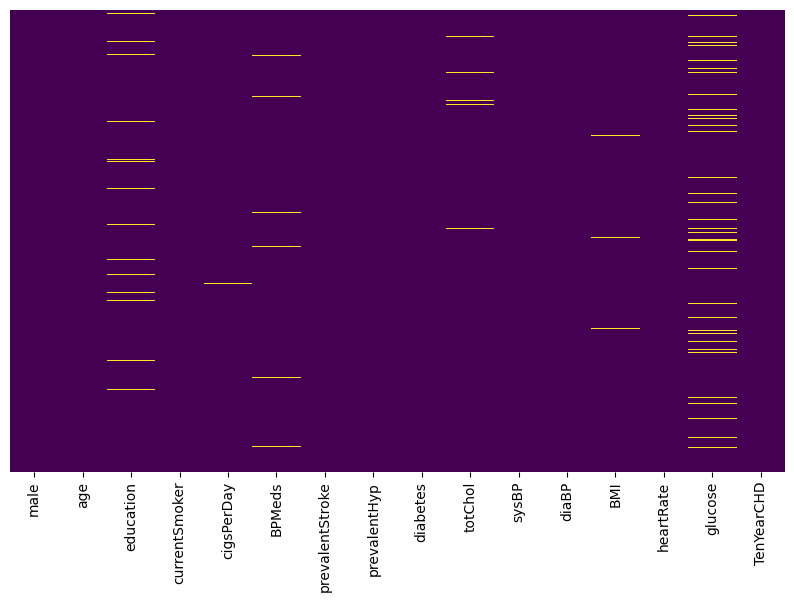

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import SimpleImputer

In [55]:
from sklearn.impute import SimpleImputer

### Create SimpleImputer object with 'mean' strategy

In [56]:
imputer = SimpleImputer(strategy='mean')

### Optional - converting df into numpy array (There is a way to directly impute from dataframe as well)

In [57]:
data = df.values

In [58]:
X = data[:, :-1]
y = data[:, -1]

### Fit the imputer model on dataset to calculate statistic for each column

In [59]:
imputer.fit(X)

SimpleImputer()

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values from the calculated statistic using transform( )

In [60]:
X_transform = imputer.transform(X)

### Sanity Check: Whether missing values are filled or not

In [61]:
print(f"Missing cells: {np.isnan(X).sum()}")

Missing cells: 645


In [62]:
print(f"Missing cells: {np.isnan(X_transform).sum()}")

Missing cells: 0


### Let's try to visualize the missing values.

<Axes: >

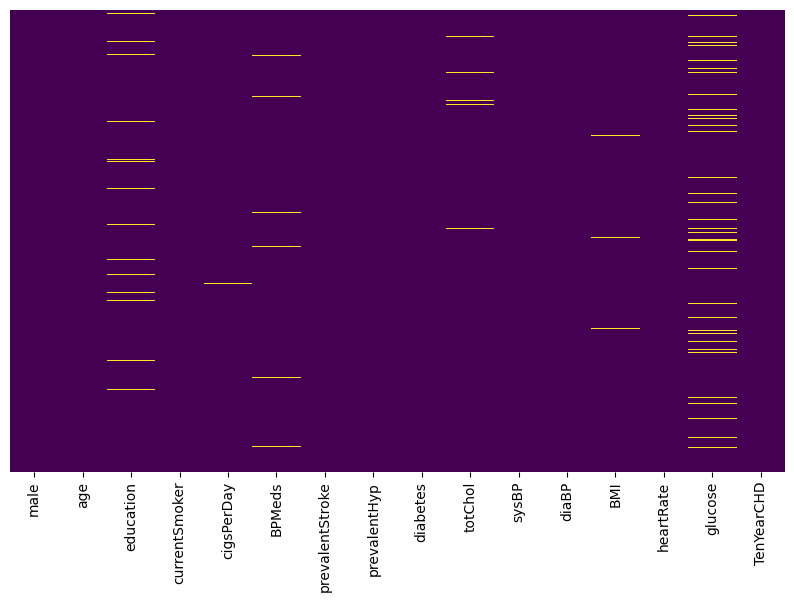

In [63]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

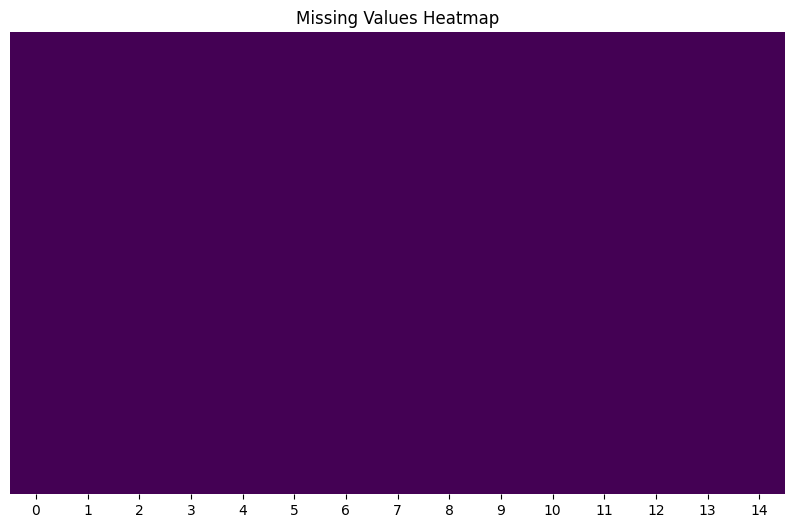

In [66]:
X_df = pd.DataFrame(X_transform)
plt.figure(figsize=(10, 6))
sns.heatmap(X_df.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

### What's the issue here?
#### Hint: Heatmap needs a DataFrame and not a Numpy Array

In [67]:
df_transform = pd.DataFrame(X_transform)
display(df_transform.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0


<Axes: >

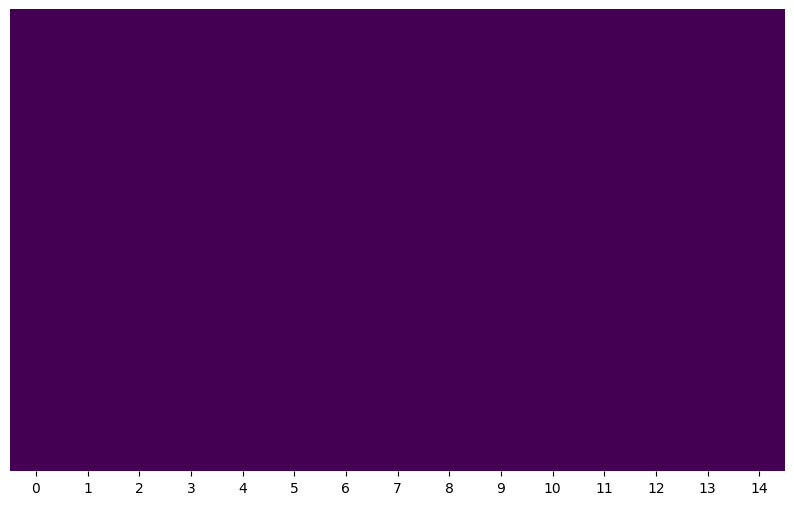

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

# Check if these datasets contain missing data
### Load the datasets

In [80]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")
X_test = pd.read_csv("X_test.csv")

X = pd.read_csv("X.csv")
y = pd.read_csv("y.csv")


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)


FileNotFoundError: [Errno 2] No such file or directory: 'X_train.csv'

In [70]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3178, 15), (3178,), (1060, 15), (1060,))

<Axes: >

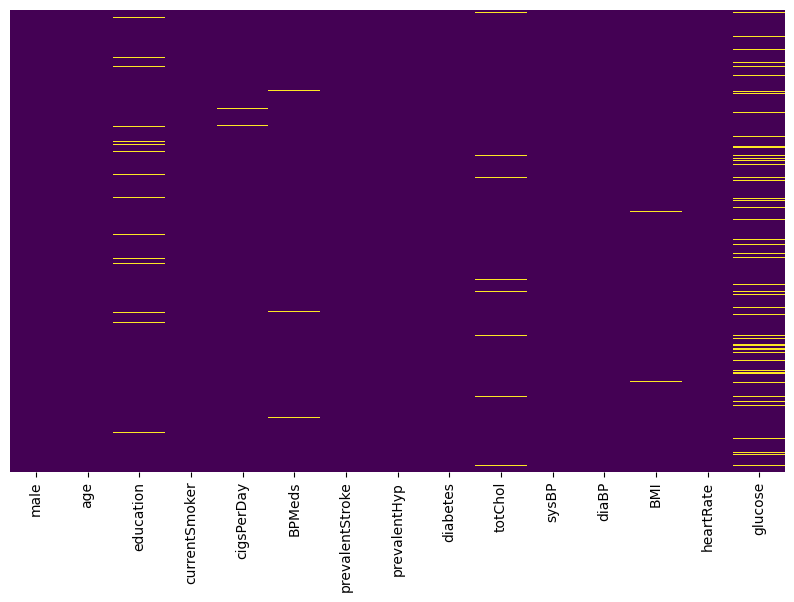

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Is there missing data in this dataset???

In [72]:
print("Missing values in X_train:")
print(X_train.isnull().sum())

Missing values in X_train:
male                 0
age                  0
education           86
currentSmoker        0
cigsPerDay          23
BPMeds              46
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            296
dtype: int64


# Build a Logistic Regression model Without imputation

In [73]:
df=pd.read_csv("/content/heart_disease.csv")
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [75]:
model = LogisticRegression()

In [76]:
# Drop rows with missing values for this model
X_dropped = X.dropna()
y_dropped = y[X_dropped.index]

model.fit(X_dropped,y_dropped)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Based on the results:

- **Dropping missing values**: Mean Accuracy: 0.85 | Std: 0.003
- **SimpleImputer with Mean Strategy**: Mean Accuracy: 0.85 | Std: 0.003

In this case, both strategies yielded very similar mean accuracies and standard deviations for the Logistic Regression model. There isn't a significant difference in performance between dropping missing values and using mean imputation for this specific dataset and model.

# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [78]:
df=pd.read_csv("data/heart_disease.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/heart_disease.csv'

In [ ]:
df.shape

### Drop rows with missing values

In [ ]:
df_dropped = df.dropna()
print(df_dropped.shape)

### Split dataset into X and y

In [ ]:
X = df_dropped.drop('TenYearCHD', axis=1)
print(X.shape)

In [ ]:
y = df_dropped['TenYearCHD']
print(y.shape)

### Create a pipeline with model parameter

In [ ]:
pipeline = Pipeline(steps=[('model', LogisticRegression())])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [ ]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
scores

### Print the Mean Accuracy and Standard Deviation from scores

In [ ]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

# Build a Logistic Regression model with SimpleImputer Mean Strategy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [ ]:
df=pd.read_csv("data/heart_disease.csv")
df

### Split dataset into X and y

In [ ]:
X = df.drop('TenYearCHD', axis=1)
print(X.shape)

In [ ]:
y = df['TenYearCHD']
print(y.head())

### Create a SimpleImputer with mean strategy

In [ ]:
imputer = SimpleImputer(strategy='mean')

### Create a Logistic Regression model

In [ ]:
model = LogisticRegression()

### Create a pipeline with impute and model parameters

In [ ]:
pipeline = Pipeline(steps=[('imputer', imputer), ('model', model)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [ ]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
scores

### Print the Mean Accuracy and Standard Deviation

In [ ]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

### Which accuracy is better?
- Dropping missing values
- SimpleImputer with Mean Strategy

# SimpleImputer Mean - Benchmark after Mean imputation with RandomForest

### Import libraries

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

### Create a SimpleImputer with mean strategy

In [ ]:
imputer = SimpleImputer(strategy='mean')

### Create a RandomForest model

In [ ]:
model = RandomForestClassifier()

### Create a pipeline

### Create RepeatedStratifiedKFold

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Create Cross_val_score

In [ ]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

### Print Mean Accuracy and Standard Deviation

In [ ]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

# Assignment
# Run experiments with different Strategies and different algorithms

## STRATEGIES
- Mean
- Median
- Most_frequent
- Constant

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice

#### Hint: Collect the pipeline creation, KFold, and Cross_Val_Score inside a for loop and iterate over different strategies in a list and different algorithms in a list

In [83]:
from sklearn.datasets import load_breast_cancer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd


data = load_breast_cancer()
X, y = data.data, data.target

# Introduce missing values artificially (10%)
rng = np.random.RandomState(42)
missing_mask = rng.rand(*X.shape) < 0.1
X[missing_mask] = np.nan

# Define imputation strategies
strategies = ['mean', 'median', 'most_frequent', 'constant']

# Define classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()  # Bonus model
}

# Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

for strategy in strategies:
    for model_name, model in models.items():
        pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy=strategy, fill_value=0)),
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
        scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
        avg_score = np.mean(scores)
        results.append({
            'Strategy': strategy,
            'Model': model_name,
            'Accuracy': avg_score
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df)

         Strategy                Model  Accuracy
8          median                  SVM  0.975392
3            mean                  SVM  0.975376
0            mean  Logistic Regression  0.973607
5          median  Logistic Regression  0.968328
10  most_frequent  Logistic Regression  0.963049
13  most_frequent                  SVM  0.961295
2            mean                  KNN  0.957771
6          median        Random Forest  0.954277
1            mean        Random Forest  0.952523
18       constant                  SVM  0.949014
7          median                  KNN  0.948999
15       constant  Logistic Regression  0.947275
11  most_frequent        Random Forest  0.947244
16       constant        Random Forest  0.947244
12  most_frequent                  KNN  0.936702
4            mean        Decision Tree  0.929716
9          median        Decision Tree  0.917451
19       constant        Decision Tree  0.917435
14  most_frequent        Decision Tree  0.912156
17       constant   

# Q1: Which is the best strategy for this dataset using Random Forest algorithm?
- MEAN
- MEDIAN
- MOST_FREQUENT
- CONSTANT

In [85]:
rf_results = results_df[results_df['Model'] == 'Random Forest']
best_rf_strategy = rf_results.sort_values(by='Accuracy', ascending=False).iloc[0]
print("Q1 Answer: The best strategy for using a Random Forest model is to:", best_rf_strategy['Strategy'])

Q1 Answer: The best strategy for using a Random Forest model is to: median


# Q2:  Which is the best algorithm for this dataset using Mean Strategy?
- Logistic Regression
- Random Forest
- KNN
- any other algorithm of your choice (BONUS)

In [86]:
mean_results = results_df[results_df['Strategy'] == 'mean']
best_mean_model = mean_results.sort_values(by='Accuracy', ascending=False).iloc[0]
print("Q2 Answer: The best model with Mean strategy is:", best_mean_model['Model'])

Q2 Answer: The best model with Mean strategy is: SVM


# Q3: Which is the best combination of algorithm and best Imputation Strategy overall?
- Mean , Median, Most_frequent, Constant
- Logistic Regression, Random Forest, KNN

In [87]:
best_overall = results_df.iloc[0]
print("Q3 Answer: Best overall combination is:")
print(" - Strategy:", best_overall['Strategy'])
print(" - Model:   ", best_overall['Model'])
print(" - Accuracy:", round(best_overall['Accuracy'], 4))

Q3 Answer: Best overall combination is:
 - Strategy: median
 - Model:    SVM
 - Accuracy: 0.9754
